# Normal Distribution

In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
dataset = pd.read_csv("PrePlacement.csv")

In [4]:
dataset

,Unnamed: 0,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed,1.0,67.00,91.00,58.00,55.0,58.80,270000.000000
1,1,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed,2.0,79.33,78.33,77.48,86.5,66.28,200000.000000
2,2,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed,3.0,65.00,68.00,64.00,75.0,57.80,250000.000000
3,3,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed,4.0,56.00,52.00,52.00,66.0,59.43,288655.405405
4,4,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed,5.0,85.80,73.60,73.30,96.8,55.50,425000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,210,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed,211.0,80.60,82.00,77.60,91.0,74.49,400000.000000
211,211,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed,212.0,58.00,60.00,72.00,74.0,53.62,275000.000000
212,212,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed,213.0,67.00,67.00,73.00,59.0,69.72,295000.000000
213,213,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed,214.0,74.00,66.00,58.00,70.0,60.23,204000.000000


In [5]:
dataset.isnull().sum()

Unnamed: 0        0
gender            0
ssc_b             0
hsc_b             0
hsc_s             0
degree_t          0
workex            0
specialisation    0
status            0
sl_no             0
ssc_p             0
hsc_p             0
degree_p          0
etest_p           0
mba_p             0
salary            0
dtype: int64

<Axes: xlabel='ssc_p', ylabel='Density'>

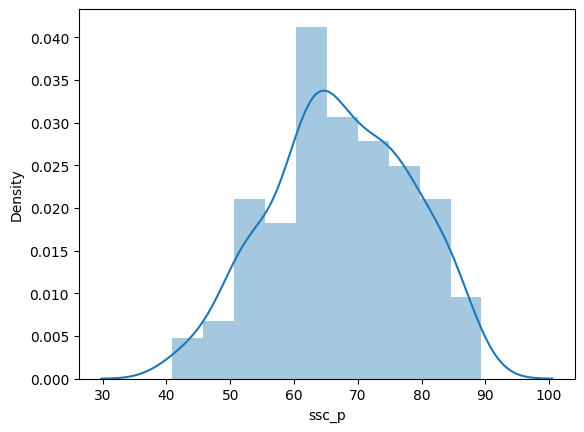

In [6]:
# Seaborn library used for graph
import seaborn as sea
sea.distplot(dataset["ssc_p"])

# PDF

In [17]:
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sea
    ax = sea.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    #generate sample
    sample = dataset
    #calculate parameters
    sample_mean = sample.mean()
    sample_std = sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    #define the distibution
    dist = norm(sample_mean, sample_std)
    
    # sample probability for a range of outcomes
    values = np.arange(startrange,endrange,0.1)
    probability = [dist.pdf(value) for value in values]
    prob = sum(probability)
    print("The are between range ({},{}):{}".format(startrange,endrange,sum(probability)))
    return prob

Mean=67.303, Standard Deviation=10.827
The are between range (70,80):2.820500458672243


2.820500458672243

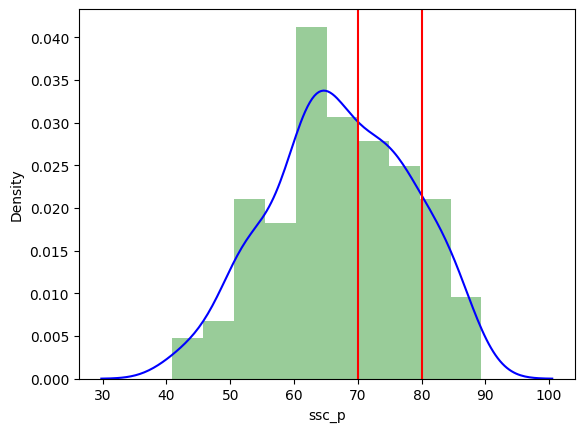

In [18]:
get_pdf_probability(dataset["ssc_p"],70,80)

# Cumulative Density Function

In [19]:
from statsmodels.distribution.empirical_disribution import ECDF
ecdf = ECDF(dataset["ssc_p"])
ecdf

ModuleNotFoundError: No module named 'statsmodels.distribution'

In [20]:
!pip install statsmodels

In [21]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(dataset["ssc_p"])
ecdf(80)

0.8651162790697674

# Standard Normal Deviation

In [22]:
def SND(dataset):
    import seaborn as sea
    mean = dataset.mean()
    std = dataset.std()
    values =[i for i in dataset]
    z_score = [((x-mean)/std) for x in values]
    sea.distplot(z_score,kde=True)

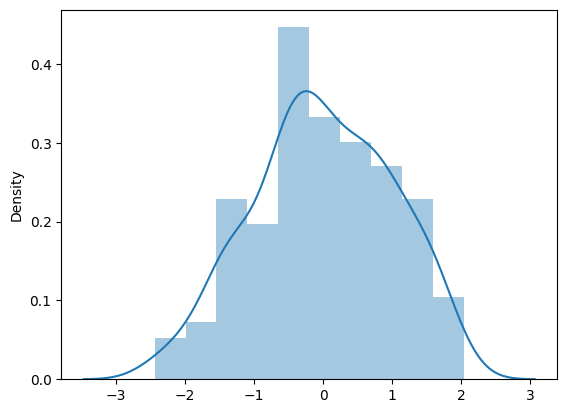

In [23]:
SND(dataset["ssc_p"])